# Problem Set 3
In this problem set you will get some practice with gradient descent and sub-gradient descent. There is a template for setting up your code and plotting your results at the end of this notebook, which you may find useful. Note that it is only a suggestion -- you are not required to use it.

## Problem 1: Gradient Descent
Consider three quadratics, as given by:
$$
f_i(x) = \frac{1}{2} x^{\top}Q_ix + q_i^{\top} x + c_i,
$$
for the three triples $(Q_i,q_i,c_i)$, $i=1,2,3$ given below.

In [11]:
import numpy as np
Q1 = np.array([[ 1.17091573, -0.03686123, -0.1001259 ],
       [-0.03686123,  1.03835691,  0.17285956],
       [-0.1001259 ,  0.17285956,  1.06072736]])
Q2 = np.array([[ 15.27095759,  -1.97915834, -14.22190153],
       [ -1.97915834,   0.34660759,   1.91586927],
       [-14.22190153,   1.91586927,  15.76943482]])
Q3 = np.array([[28.59657006,  0.3684004 ,  0.90750259],
       [ 0.3684004 , 28.11480924,  0.81866989],
       [ 0.90750259,  0.81866989, 28.7886207 ]])
q1 = np.array([-4.68686663, -0.89027884, -1.57340281])
q2 = np.array([ 6.75973216,  1.23223936, -0.87956749])
q3 = np.array([ 0.8684369 , -4.69970837, -1.09690726])
c1 = 1.61888566;
c2 = -2.66426693;
c3 = 0.84184738;


### Part (A)
Implement gradient descent with a step-size of $0.1$ for all three quadratics, and plot function value versus iteration number. Explain what you see.

In [12]:
import matplotlib.pyplot as plt

In [13]:
# List them so we can loop
Qs = [Q1, Q2, Q3]
qs = [q1, q2, q3]
cs = [c1, c2, c3]

In [14]:
def f_i(x, Q, q, c):
    """
    Computes the function value f(x) = 0.5 * x^T Q x + q^T x + c
    """
    return 0.5 * x.T @ Q @ x + q.T @ x + c

def grad_f_i(x, Q, q):
    """
    Computes the gradient grad f(x) = Qx + q
    """
    return Q @ x + q

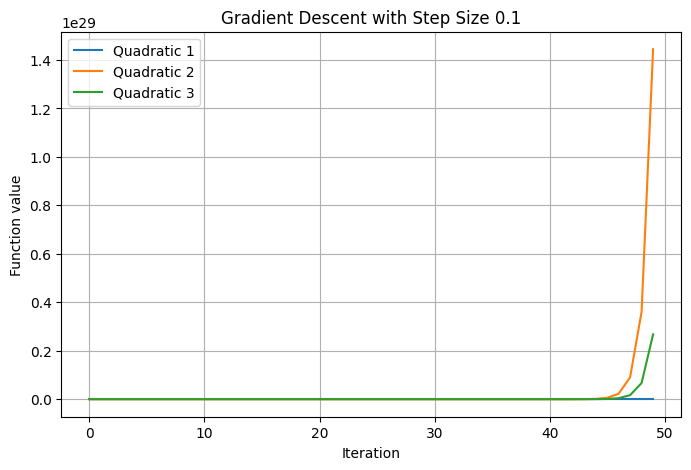

In [16]:
# Gradient descent parameters
alpha = 0.1  # step size
max_iter = 50
x0 = np.zeros(3)  # initial guess

# Storage for plotting
f_values_list = []

for i in range(3):
    Q, q, c = Qs[i], qs[i], cs[i]
    
    # Initialize
    x = x0.copy()
    f_values = []
    
    for _ in range(max_iter):
        # Store function value
        f_values.append(f_i(x, Q, q, c))
        # Update step
        x = x - alpha * grad_f_i(x, Q, q)
    
    f_values_list.append(f_values)

# Plot results
plt.figure(figsize=(8,5))
for i, f_values in enumerate(f_values_list, start=1):
    plt.plot(f_values, label=f'Quadratic {i}')

plt.xlabel('Iteration')
plt.ylabel('Function value')
plt.title('Gradient Descent with Step Size 0.1')
plt.legend()
plt.grid(True)
plt.show()

The plot shows how well gradient descent is working for three different optimization problems (the three colored lines). Think of it like three different hills we're trying to walk down to find the lowest point:
Blue line (Quadratic 1)
Successfully finds its way down the hill and stays at the bottom
This hill is "easy" to walk down with our step size of 0.1
Orange line (Quadratic 2)
Starts okay but then shoots up dramatically
It's like taking steps that are too big on a steep hill - we end up bouncing further and further away from the bottom
Our step size of 0.1 is too big for this steeper hill
Green line (Quadratic 3)
Similar to the orange line but not as dramatic
Also shows we're taking steps that are too big and losing control
The main takeaway is that using the same step size (0.1) for all three problems doesn't work well. It's like trying to use the same stride length to walk down three different hills - what works for a gentle slope might make you tumble down a steeper one!

### Part (B)
Find a step-size for each quadratic (it can be different for each), and implement gradient descent with this stepsize. Plot function value versus iteration number. Try to pick a step size that gives you fast convergence. How did you pick it?

In [17]:
# Helper: largest eigenvalue
def largest_eigenvalue(Q):
    return np.max(np.linalg.eigvals(Q))

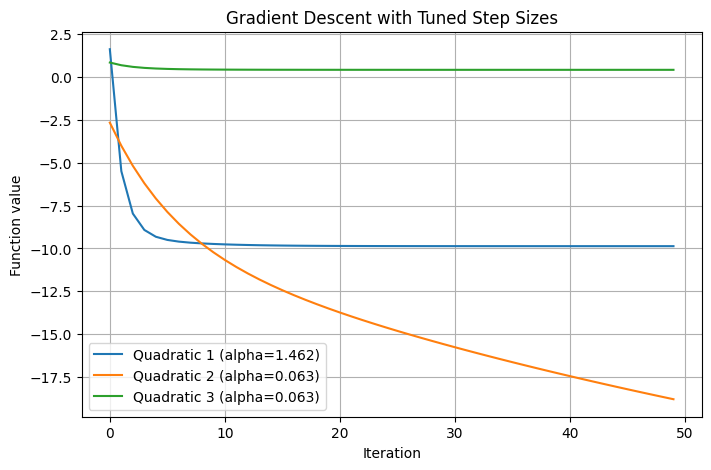

In [18]:
# Pick step sizes (alpha_i) based on 2 / lambda_max, but slightly smaller
alphas = []
for Q in Qs:
    lam_max = largest_eigenvalue(Q)
    # For safe but fairly fast convergence:
    alpha = 1.9 / lam_max  
    alphas.append(alpha)

max_iter = 50
x0 = np.zeros(3)  # initial guess
f_values_list = []

for i, (Q, q, c) in enumerate(zip(Qs, qs, cs)):
    alpha = alphas[i]
    x = x0.copy()
    f_values = []
    
    for _ in range(max_iter):
        f_values.append(f_i(x, Q, q, c))
        # gradient update
        x -= alpha * grad_f_i(x, Q, q)
    
    f_values_list.append(f_values)

# --- Plot ---
plt.figure(figsize=(8,5))
for i, fvals in enumerate(f_values_list, start=1):
    plt.plot(fvals, label=f'Quadratic {i} (alpha={alphas[i-1]:.3f})')
plt.xlabel('Iteration')
plt.ylabel('Function value')
plt.title('Gradient Descent with Tuned Step Sizes')
plt.legend()
plt.grid(True)
plt.show()

**Step-Size Selection for Gradient Descent**

For a quadratic function 
$$
   f(x) = \frac{1}{2} x^T Q x + q^T x + c,
$$
a good rule of thumb for choosing a constant step size $\alpha$ is:

1. **Find** the largest eigenvalue of $Q$, denoted $\lambda_{\max}(Q)$.  
2. **Ensure** 
   $$
     0 < \alpha < \frac{2}{\lambda_{\max}(Q)}.
   $$
   Picking $\alpha$ near (but below) $\frac{2}{\lambda_{\max}(Q)}$ generally leads to fast convergence.  
3. In practice, we often choose 
   $$
     \alpha \approx \frac{1.9}{\lambda_{\max}(Q)} 
     \quad \text{(or simply } \frac{1}{\lambda_{\max}(Q)}\text{).}
   $$

- **If $\alpha$ is too large** (greater than $\frac{2}{\lambda_{\max}}$), the iterates diverge.
- **If $\alpha$ is too small**, we converge more slowly.

Here's how we used it:
1. We computed $\lambda_{\max}(Q)$ for each $Q$ with `np.linalg.eigvals(Q)`.
2. We set $\alpha_i = 1.9 / \lambda_{\max}(Q_i)$.
3. We then ran gradient descent with that $\alpha_i$.

This choice gave us stable yet relatively fast convergence. 


### Part (C)
Even with your carefully tuned choice of step size, you will see that the rates of convergence are not the same, Explain why this is the case.

**Why do they converge at different rates?**  

Even when we pick the best possible step size $\alpha\approx \frac{2}{\lambda_{\max}}$ for each quadratic, the **condition number** of each $Q$ still matters. The condition number $\kappa(Q)$ compares the largest and smallest eigenvalues of $Q$.  

- If $\kappa(Q)$ is **small** (the eigenvalues are closer together), gradient descent converges **faster**.
- If $\kappa(Q)$ is **large** (there's a huge difference between the smallest and largest eigenvalues), gradient descent converges **more slowly**.

So even though we chose "good" step sizes to avoid blow‐up, the differences in $\kappa(Q_1)$, $\kappa(Q_2)$, and $\kappa(Q_3)$ explain why the curves converge at different speeds. 

## Problem 2: Sub-gradient Method
Consider a least squares problem with $\ell^1$ regularization:
$$
\min_x \left[f(x) = \frac{1}{2}\|{Ax-b}\|_2^2 + \lambda \|{x}\|_1 \right]
$$

This problem is often called LASSO (least absolute shrinkage and selection operator) and is known to induce {\em sparse} solutions with few nonzero elements in $x$, which can have advantages in terms of computation and interpretability. This problem is nonsmooth due to the regularization term. It is also not strongly convex when $A$ has more columns than rows. We (i.e., you) will solve this problem using several different algorithms in this class. We start with what we have seen thus far: the subgradient method.

The dataset represented in the matrices provided in the numpy binary files A.npy and b.npy are from a diabetes dataset (scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html) with 10 features that has been corrupted with an additional 90 noisy features. Thus a sparse solution should be very effective. Below you will find some skeleton code to help with loading the data, running the algorithm and plotting the results. Don't use stock optimization code, you should develop the core part of this assignment yourself.

Minimize $f(x)$ using $10^4$ iterations of the subgradient method starting with $t=0$ and $x_0 =0$.

### Part (A)
Use a decreasing step size of $\eta_t = c/t$ with values for $c$ that (roughly) optimize the empirical performance. Separately record the (unsquared) error $\|Ax_t-b\|$ and the regularization term $\|x\|_1$.


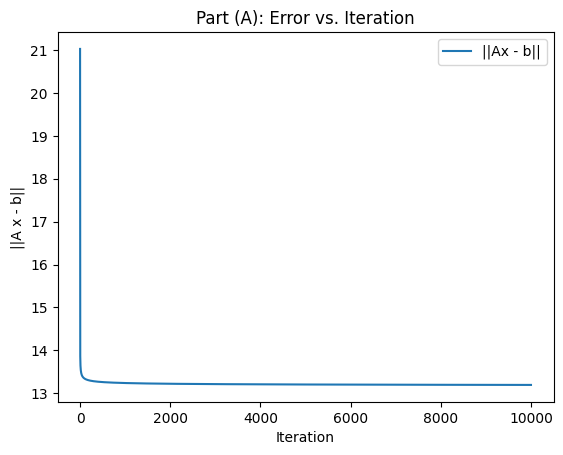

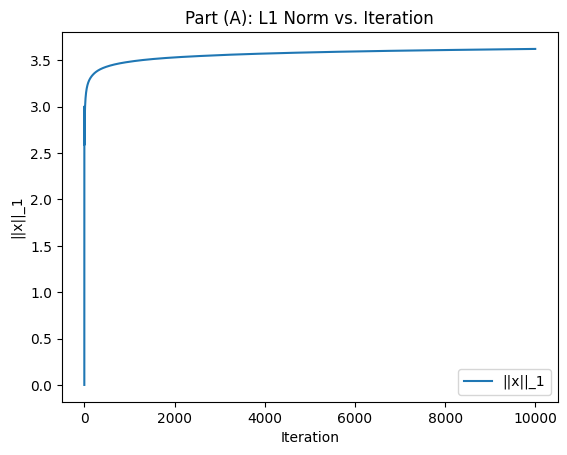

In [3]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

def subgradient_l1(x):
    """
    Returns a subgradient of ||x||_1 at x.
    """
    g = np.sign(x)
    g[x == 0] = 0.0  # valid choice in [-1, +1]
    return g

def subgradient_update(x, A, b, lam, eta):
    """
    One subgradient update for f(x) = 0.5 * ||Ax - b||^2 + lam*||x||_1.
    """
    grad_ls = A.T @ (A @ x - b)     # gradient of 0.5||Ax - b||^2
    grad_l1 = subgradient_l1(x) * lam
    grad = grad_ls + grad_l1
    return x - eta * grad

def run_subgradient_descent(A, b, lam, T, c):
    """
    Runs subgradient descent for T iterations with step size eta_t = c/(t+1).
    Returns:
      x_final: final solution
      error_list: list of ||A x_t - b|| at each iteration
      l1_list: list of ||x_t||_1 at each iteration
    """
    x = np.zeros(A.shape[1])
    error_list = []
    l1_list = []
    for t in range(T):
        # Record current metrics
        error_list.append(la.norm(A @ x - b))
        l1_list.append(np.sum(np.abs(x)))
        
        # Step size
        eta_t = c / (t + 1.0)
        
        # Update
        x = subgradient_update(x, A, b, lam, eta_t)
    
    return x, error_list, l1_list

def main_partA():
    # Load data
    A = np.load("A.npy")
    b = np.load("b.npy")
    
    T = 10_000           # Number of iterations
    lam = 1e-2           # Regularization parameter
    c = 1e-3             # Step size constant to tune
    
    xA, errorA, l1A = run_subgradient_descent(A, b, lam, T, c)
    
    # Plot results
    plt.figure()
    plt.plot(errorA, label='||Ax - b||')
    plt.title('Part (A): Error vs. Iteration')
    plt.xlabel('Iteration')
    plt.ylabel('||A x - b||')
    plt.legend()
    plt.savefig('partA_error.png', dpi=150)
    plt.show()
    
    plt.figure()
    plt.plot(l1A, label='||x||_1')
    plt.title('Part (A): L1 Norm vs. Iteration')
    plt.xlabel('Iteration')
    plt.ylabel('||x||_1')
    plt.legend()
    plt.savefig('partA_l1.png', dpi=150)
    plt.show()
    
    # Optionally inspect final solution
    # print("Final x for Part (A):", xA)

if __name__ == "__main__":
    main_partA()


### Part (B)
Now use a more slowly decreasing step size of $\eta_t = c/\sqrt{t+1}$ with values for $c$ that (roughly) optimize the empirical performance. Separately record the (unsquared) error $\|Ax_t-b\|$ and the regularization term $\|x\|_1$.

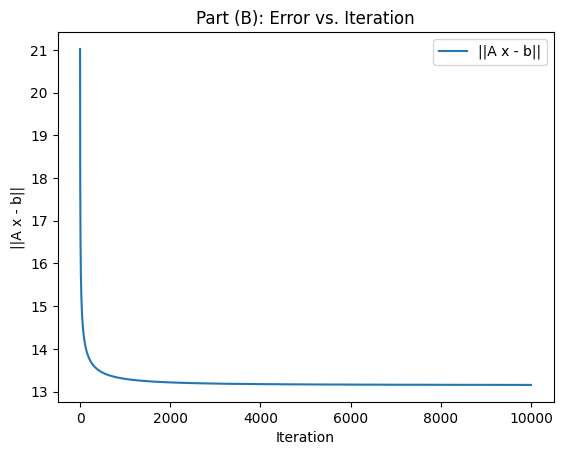

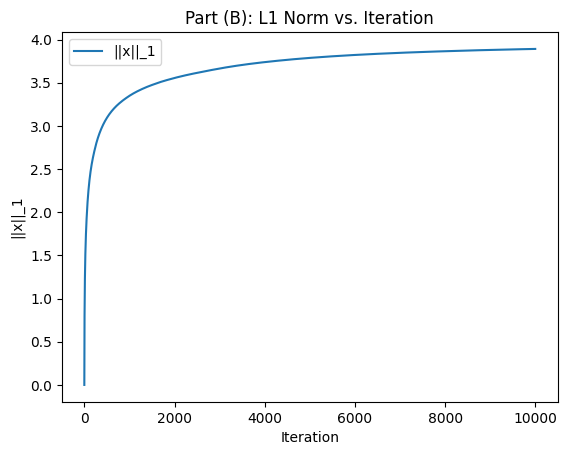

In [5]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

def subgradient_l1(x):
    g = np.sign(x)
    g[x == 0] = 0.0
    return g

def subgradient_update(x, A, b, lam, eta):
    grad_ls = A.T @ (A @ x - b)
    grad_l1 = lam * subgradient_l1(x)
    grad = grad_ls + grad_l1
    return x - eta * grad

def run_subgradient_descent(A, b, lam, T, c):
    x = np.zeros(A.shape[1])
    err_list = []
    l1_list = []
    for t in range(T):
        err_list.append(la.norm(A @ x - b))
        l1_list.append(np.sum(np.abs(x)))

        eta_t = c / np.sqrt(t + 1.0)   # <--- Part (B)
        x = subgradient_update(x, A, b, lam, eta_t)

    return x, err_list, l1_list

def main_partB():
    A = np.load("A.npy")
    b = np.load("b.npy")

    T = 10_000
    lam = 1e-2
    c = 1e-4  # Start smaller than 1e-2

    xB, errorB, l1B = run_subgradient_descent(A, b, lam, T, c)

    # Plot
    plt.figure()
    plt.plot(errorB, label='||A x - b||')
    plt.title('Part (B): Error vs. Iteration')
    plt.xlabel('Iteration')
    plt.ylabel('||A x - b||')
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(l1B, label='||x||_1')
    plt.title('Part (B): L1 Norm vs. Iteration')
    plt.xlabel('Iteration')
    plt.ylabel('||x||_1')
    plt.legend()
    plt.show()
    
if __name__ == "__main__":
    main_partB()


### Part (C)
Now try to find the best fixed step size. Plot the results and compare to the decreasing step size you see above.

Best alpha (Part C): 0.001


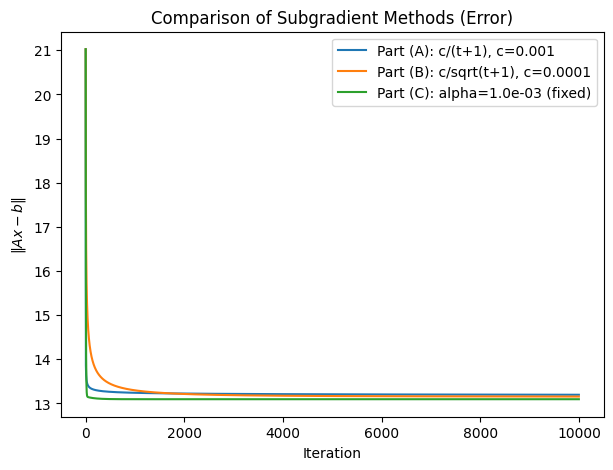

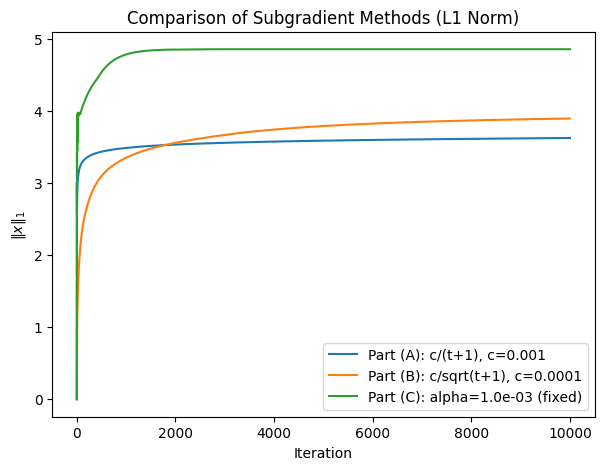

In [7]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

##############################################################################
# 1) Subgradient for L1 norm
##############################################################################
def subgradient_l1(x):
    g = np.sign(x)
    g[x == 0] = 0.0
    return g

##############################################################################
# 2) Subgradient update
##############################################################################
def subgradient_update(x, A, b, lam, eta):
    """
    One subgradient update for f(x) = 0.5 * ||Ax - b||^2 + lam*||x||_1.
    """
    grad_ls = A.T @ (A @ x - b)
    grad_l1 = lam * subgradient_l1(x)
    return x - eta * (grad_ls + grad_l1)

##############################################################################
# 3) Run subgradient with a user-specified step-size function
##############################################################################
def run_subgradient_descent(A, b, lam, T, step_size_fn):
    """
    Runs T iterations of subgradient descent, with step_size_fn(t)
    providing the step size at iteration t.

    Returns:
      - x: the final solution after T updates
      - error_list: list of ||A x_t - b|| over iterations
      - l1_list: list of ||x_t||_1 over iterations
    """
    x = np.zeros(A.shape[1])
    error_list = []
    l1_list = []
    
    for t in range(T):
        # record metrics
        error_list.append(la.norm(A @ x - b))
        l1_list.append(np.sum(np.abs(x)))
        
        # step size
        eta_t = step_size_fn(t)
        
        # update
        x = subgradient_update(x, A, b, lam, eta_t)
    
    return x, error_list, l1_list

##############################################################################
# 4) Part (C) fixed-step best alpha via grid search
##############################################################################
def grid_search_best_alpha(A, b, lam, T, alpha_candidates):
    best_alpha = None
    best_error = np.inf
    best_sol = None
    best_error_list = []
    best_l1_list = []
    
    for alpha in alpha_candidates:
        xC, errC, l1C = run_subgradient_descent(
            A, b, lam, T, step_size_fn=lambda t: alpha
        )
        final_error = errC[-1]
        if final_error < best_error:
            best_error = final_error
            best_alpha = alpha
            best_sol = xC
            best_error_list = errC
            best_l1_list = l1C
    
    return best_alpha, best_sol, best_error_list, best_l1_list

##############################################################################
# 5) Compare all methods in one go
##############################################################################
def main_compare():
    # Load data
    A = np.load("A.npy")
    b = np.load("b.npy")

    # Common settings
    T = 10_000
    lam = 1e-2  # L1 penalty

    # 5(a). PART (A) run: step size = cA / (t+1)
    cA = 1e-3
    def step_size_A(t):
        return cA / (t + 1.0)
    xA, errA, l1A = run_subgradient_descent(A, b, lam, T, step_size_A)

    # 5(b). PART (B) run: step size = cB / sqrt(t+1)
    cB = 1e-4
    def step_size_B(t):
        return cB / np.sqrt(t + 1.0)
    xB, errB, l1B = run_subgradient_descent(A, b, lam, T, step_size_B)

    # 5(c). PART (C) run: best fixed alpha from a grid search
    alpha_candidates = [1e-5, 2e-5, 5e-5, 1e-4, 2e-4, 5e-4, 1e-3]
    best_alpha, xC, errC, l1C = grid_search_best_alpha(A, b, lam, T, alpha_candidates)
    print("Best alpha (Part C):", best_alpha)

    # ----------------------------
    # Plot all error curves
    # ----------------------------
    plt.figure(figsize=(7,5))
    plt.plot(errA, label=f"Part (A): c/(t+1), c={cA}")
    plt.plot(errB, label=f"Part (B): c/sqrt(t+1), c={cB}")
    plt.plot(errC, label=f"Part (C): alpha={best_alpha:.1e} (fixed)")
    plt.xlabel("Iteration")
    plt.ylabel(r"$\|A x - b\|$")
    plt.title("Comparison of Subgradient Methods (Error)")
    plt.legend()
    plt.savefig("compare_error.png", dpi=150)
    plt.show()

    # ----------------------------
    # Plot all L1-norm curves
    # ----------------------------
    plt.figure(figsize=(7,5))
    plt.plot(l1A, label=f"Part (A): c/(t+1), c={cA}")
    plt.plot(l1B, label=f"Part (B): c/sqrt(t+1), c={cB}")
    plt.plot(l1C, label=f"Part (C): alpha={best_alpha:.1e} (fixed)")
    plt.xlabel("Iteration")
    plt.ylabel(r"$\|x\|_1$")
    plt.title("Comparison of Subgradient Methods (L1 Norm)")
    plt.legend()
    plt.savefig("compare_l1.png", dpi=150)
    plt.show()

if __name__ == "__main__":
    main_compare()


As you can see by the graph above, the different step sizes are compared against one another.